In [1]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [2]:
data= california_housing.frame
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

## question number 1.1

In [3]:
import numpy as np
from scipy.stats import multivariate_normal

def expectation_step(X, pi, mu, cov):
    N, D = X.shape
    K = len(pi)
    resp = np.zeros((N, K))

    for k in range(K):
        resp[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k], allow_singular=True)

    # Normalize the responsibilities
    resp_sum = np.sum(resp, axis=1)
    for k in range(K):
        resp[:, k] /= resp_sum

    return resp

def maximization_step(X, resp):
    N, D = X.shape
    K = resp.shape[1]

    # Update pi
    pi = np.sum(resp, axis=0) / N

    # Update mu
    mu = np.zeros((K, D))
    for k in range(K):
        mu[k] = np.sum(resp[:, k].reshape(-1, 1) * X, axis=0) / np.sum(resp[:, k])

    # Update covariance
    cov = np.zeros((K, D, D))
    for k in range(K):
        diff = X - mu[k]
        cov[k] = np.dot(resp[:, k] * diff.T, diff) / np.sum(resp[:, k])

    return pi, mu, cov

def EM(X, K, max_iter=100):
    N, D = X.shape

    # Initialize the parameters
    pi = np.ones(K) / K
    np.random.seed(2000)
    mu = np.random.randn(K, D)
    cov = np.array([np.eye(D) for _ in range(K)])

    # Run EM algorithm
    for i in range(max_iter):
        resp = expectation_step(X, pi, mu, cov)
        pi, mu, cov = maximization_step(X, resp)

    return pi, mu, cov

***Q2***

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = PCA(n_components=2).fit_transform(data)
scaled_data = StandardScaler().fit_transform(data)
new_data = pd.DataFrame(scaled_data,columns = ['feature_1','feature_2'])
new_data.head()

feature_1  feature_2
0  -0.974455   0.712539
1   0.861450  -0.386181
2  -0.820837   1.663057
3  -0.766088   1.687577
4  -0.759907   1.687356

In [5]:
"""from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = PCA(n_components=2).fit_transform(data)
#scaled_data = StandardScaler().fit_transform(data)
new_data = pd.DataFrame(data,columns = ['feature_1','feature_2'])
new_data.head()"""

"from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\nimport pandas as pd\n\ndata = PCA(n_components=2).fit_transform(data)\n#scaled_data = StandardScaler().fit_transform(data)\nnew_data = pd.DataFrame(data,columns = ['feature_1','feature_2'])\nnew_data.head()"

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='feature_1', ylabel='feature_2'>

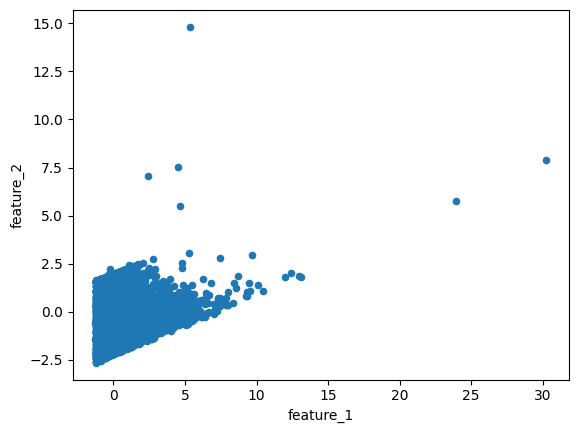

In [6]:
new_data.plot.scatter(x='feature_1',y='feature_2')

***Q3***

***K = 2***

In [7]:
pi_k2,mu_k2,sigma_k2 = EM(new_data,K=2,max_iter = 300)
print("Pi values :",pi_k2)
print("Mean values:\n",mu_k2)
print("covaraince matrix:\n",sigma_k2)

Pi values : [0.16138386 0.83861614]
Mean values:
 [[ 1.3509222  -0.32226596]
 [-0.25997239  0.06201708]]
covaraince matrix:
 [[[ 2.86213956  0.63154218]
  [ 0.63154218  0.91148599]]

 [[ 0.22286048 -0.02163143]
  [-0.02163143  0.99320158]]]


***K=3***

In [8]:
pi_k3,mu_k3,sigma_k3 = EM(new_data,K=3,max_iter = 300)
print("Pi values :",pi_k3)
print("Mean values:\n",mu_k3)
print("covaraince matrix:\n",sigma_k3)

Pi values : [0.04035775 0.64222075 0.3174215 ]
Mean values:
 [[ 2.90081072 -0.11797535]
 [-0.38073969  0.26268593]
 [ 0.40151267 -0.51647774]]
covaraince matrix:
 [[[5.80681541 1.29913237]
  [1.29913237 1.35329409]]

 [[0.14302056 0.01656332]
  [0.01656332 0.91000689]]

 [[0.59835412 0.25455163]
  [0.25455163 0.72902876]]]


In [9]:
pi_k4,mu_k4,sigma_k4 = EM(new_data,K=4,max_iter = 300)
print("Pi values :",pi_k4)
print("Mean values:\n",mu_k4)
print("covaraince matrix:\n",sigma_k4)

Pi values : [0.0189858  0.34237093 0.15850838 0.48013488]
Mean values:
 [[ 3.96639622  0.34920502]
 [-0.49408347  0.80072185]
 [ 0.97593362 -0.56686989]
 [-0.12671245 -0.39763866]]
covaraince matrix:
 [[[8.44742458 1.38763361]
  [1.38763361 1.96303548]]

 [[0.09727084 0.0282931 ]
  [0.0282931  0.44598818]]

 [[0.89701505 0.26327939]
  [0.26327939 0.56330298]]

 [[0.25655815 0.19762811]
  [0.19762811 0.77492347]]]


***Q4***

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
def prediction(data, K, N, means, covariances, mixing_coefficients):
    predicted_k = np.zeros(N, dtype=int)
    for n in range(N):
        probabilities = np.zeros(K)
        for k in range(K):
            probabilities[k] = mixing_coefficients[k]*multivariate_normal.pdf(data.iloc[n,:], list(means[k]),list(covariances[k]),allow_singular=True)
        predicted_k[n] = int(np.argmax(probabilities))
    return predicted_k

In [12]:
predicted_data=prediction(new_data,2,new_data.shape[0],mu_k2,sigma_k2,pi_k2)
silhouette=silhouette_score(new_data,predicted_data)
print('silhouette score is for k=2',silhouette)

silhouette score is for k=2 0.4554871950955168


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


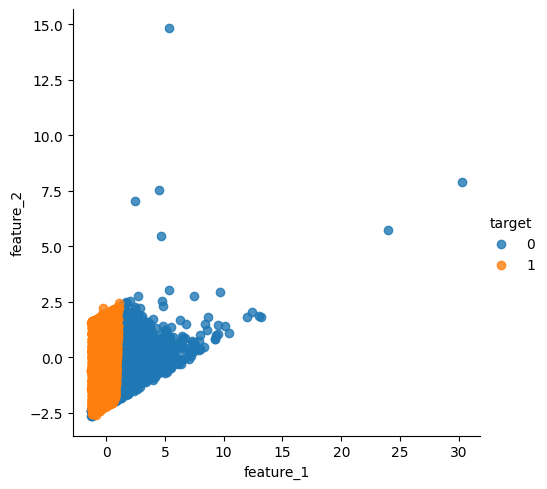

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
data=new_data
data['target']=predicted_data
sns.lmplot(data=data, x='feature_1', y='feature_2' ,hue='target',fit_reg=False, legend=True, legend_out=True)
plt.show()

In [14]:
predicted_data=prediction(new_data.iloc[:,:2],3,new_data.iloc[:,:2].shape[0],mu_k3,sigma_k3,pi_k3)
silhouette=silhouette_score(new_data,predicted_data)
print('silhouette score is for k=3',silhouette)

silhouette score is for k=3 0.2993637667696807


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


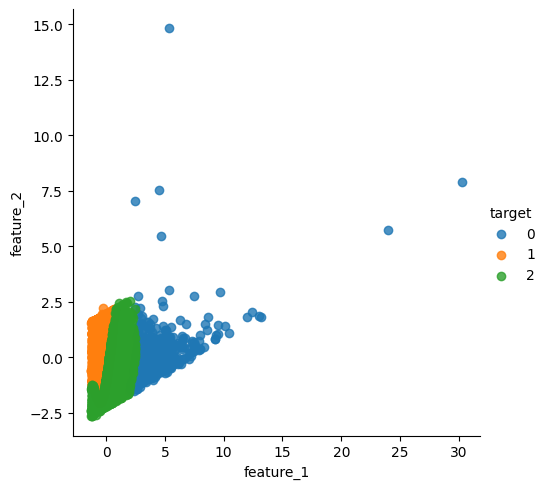

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
data=new_data
data['target']=predicted_data
sns.lmplot(data=data, x='feature_1', y='feature_2' ,hue='target',fit_reg=False, legend=True, legend_out=True)
plt.show()

In [16]:
predicted_data=prediction(new_data.iloc[:,:2],4,new_data.iloc[:,:2].shape[0],mu_k4,sigma_k4,pi_k4)
silhouette=silhouette_score(new_data,predicted_data)
print('silhouette score is for k=4',silhouette)

silhouette score is for k=4 0.29060250473492943


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


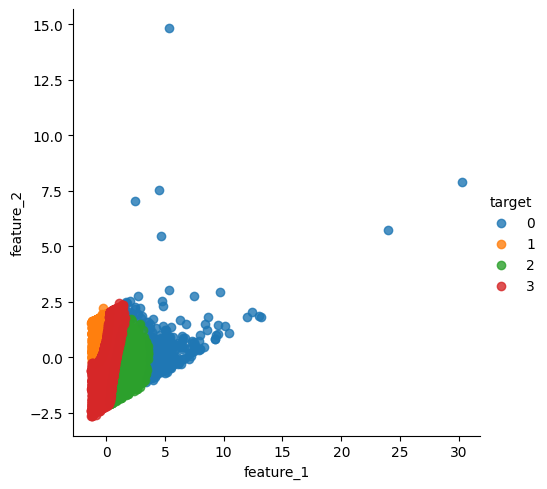

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
data=new_data
data['target']=predicted_data
sns.lmplot(data=data, x='feature_1', y='feature_2' ,hue='target',fit_reg=False, legend=True, legend_out=True)
plt.show()